<a href="https://colab.research.google.com/github/swethapatil13/CKD-prediction/blob/main/PP_2(stage).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
kidney=pd.read_csv('kidney_disease.csv')

In [ ]:
kidney.shape

(400, 26)

In [ ]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [ ]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that

In [ ]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(kidney,i)

In [ ]:
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
kidney.drop('id',inplace=True,axis=1)

In [ ]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(kidney)

In [ ]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
num_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


cad has ['no' 'yes' '\tno' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'ckd\t' 'notckd'] values




In [ ]:
kidney['dm'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['cad'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [ ]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' nan] values


cad has ['no' 'yes' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'notckd'] values




In [ ]:
len(num_col)

14

In [ ]:
# plt.figure(figsize=(30,30))
# for i,feature in enumerate(num_col):
#     plt.subplot(5,3,i+1)   # 5 rows and 3 columns
#     kidney[feature].hist()
#     plt.title(feature)

In [ ]:
len(cat_col)

11

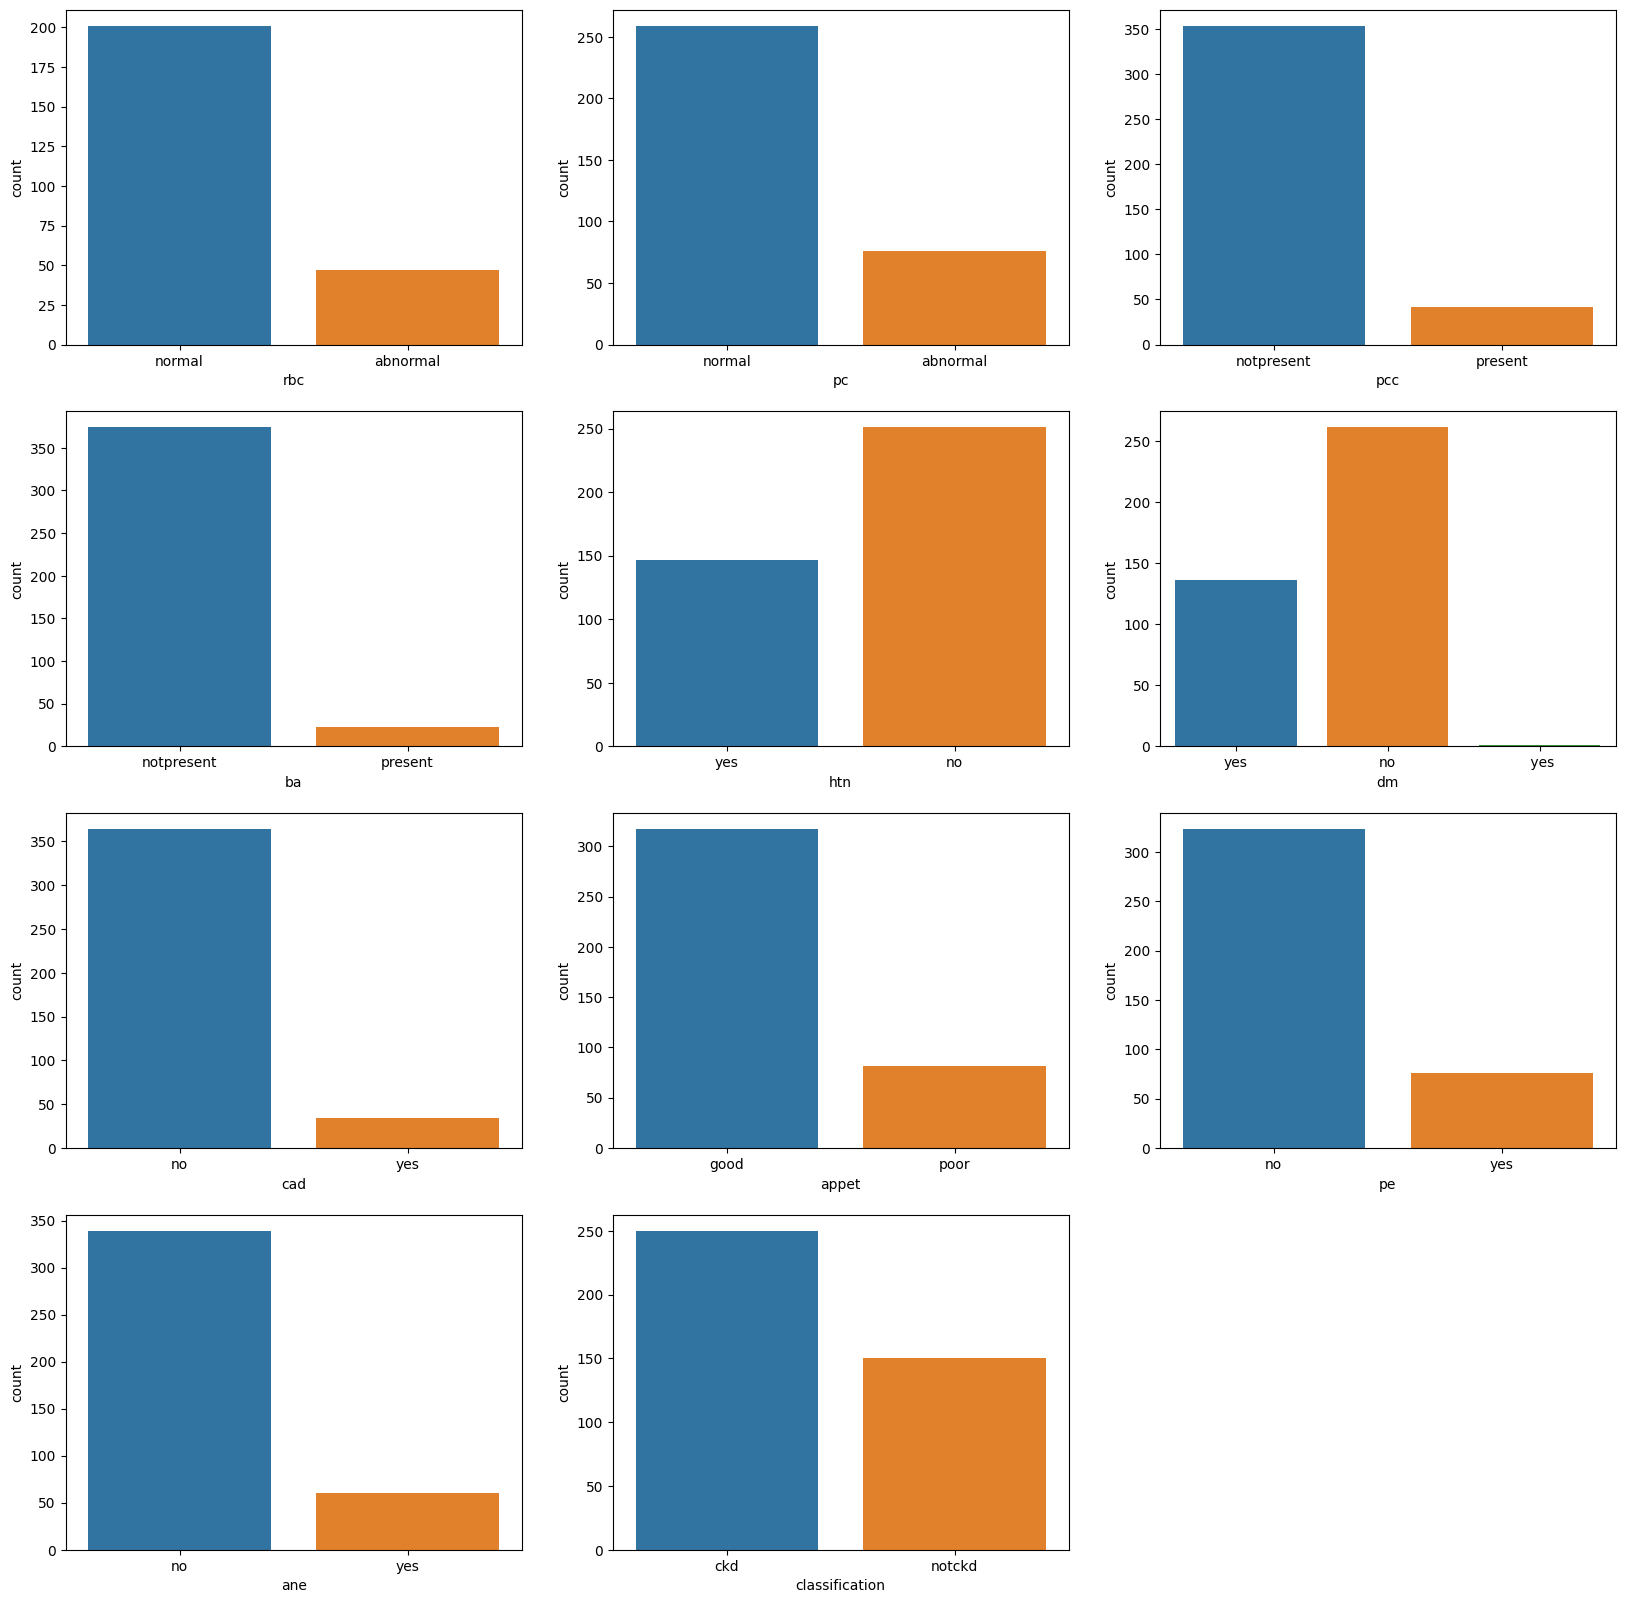

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(x=kidney[feature], data=kidney)

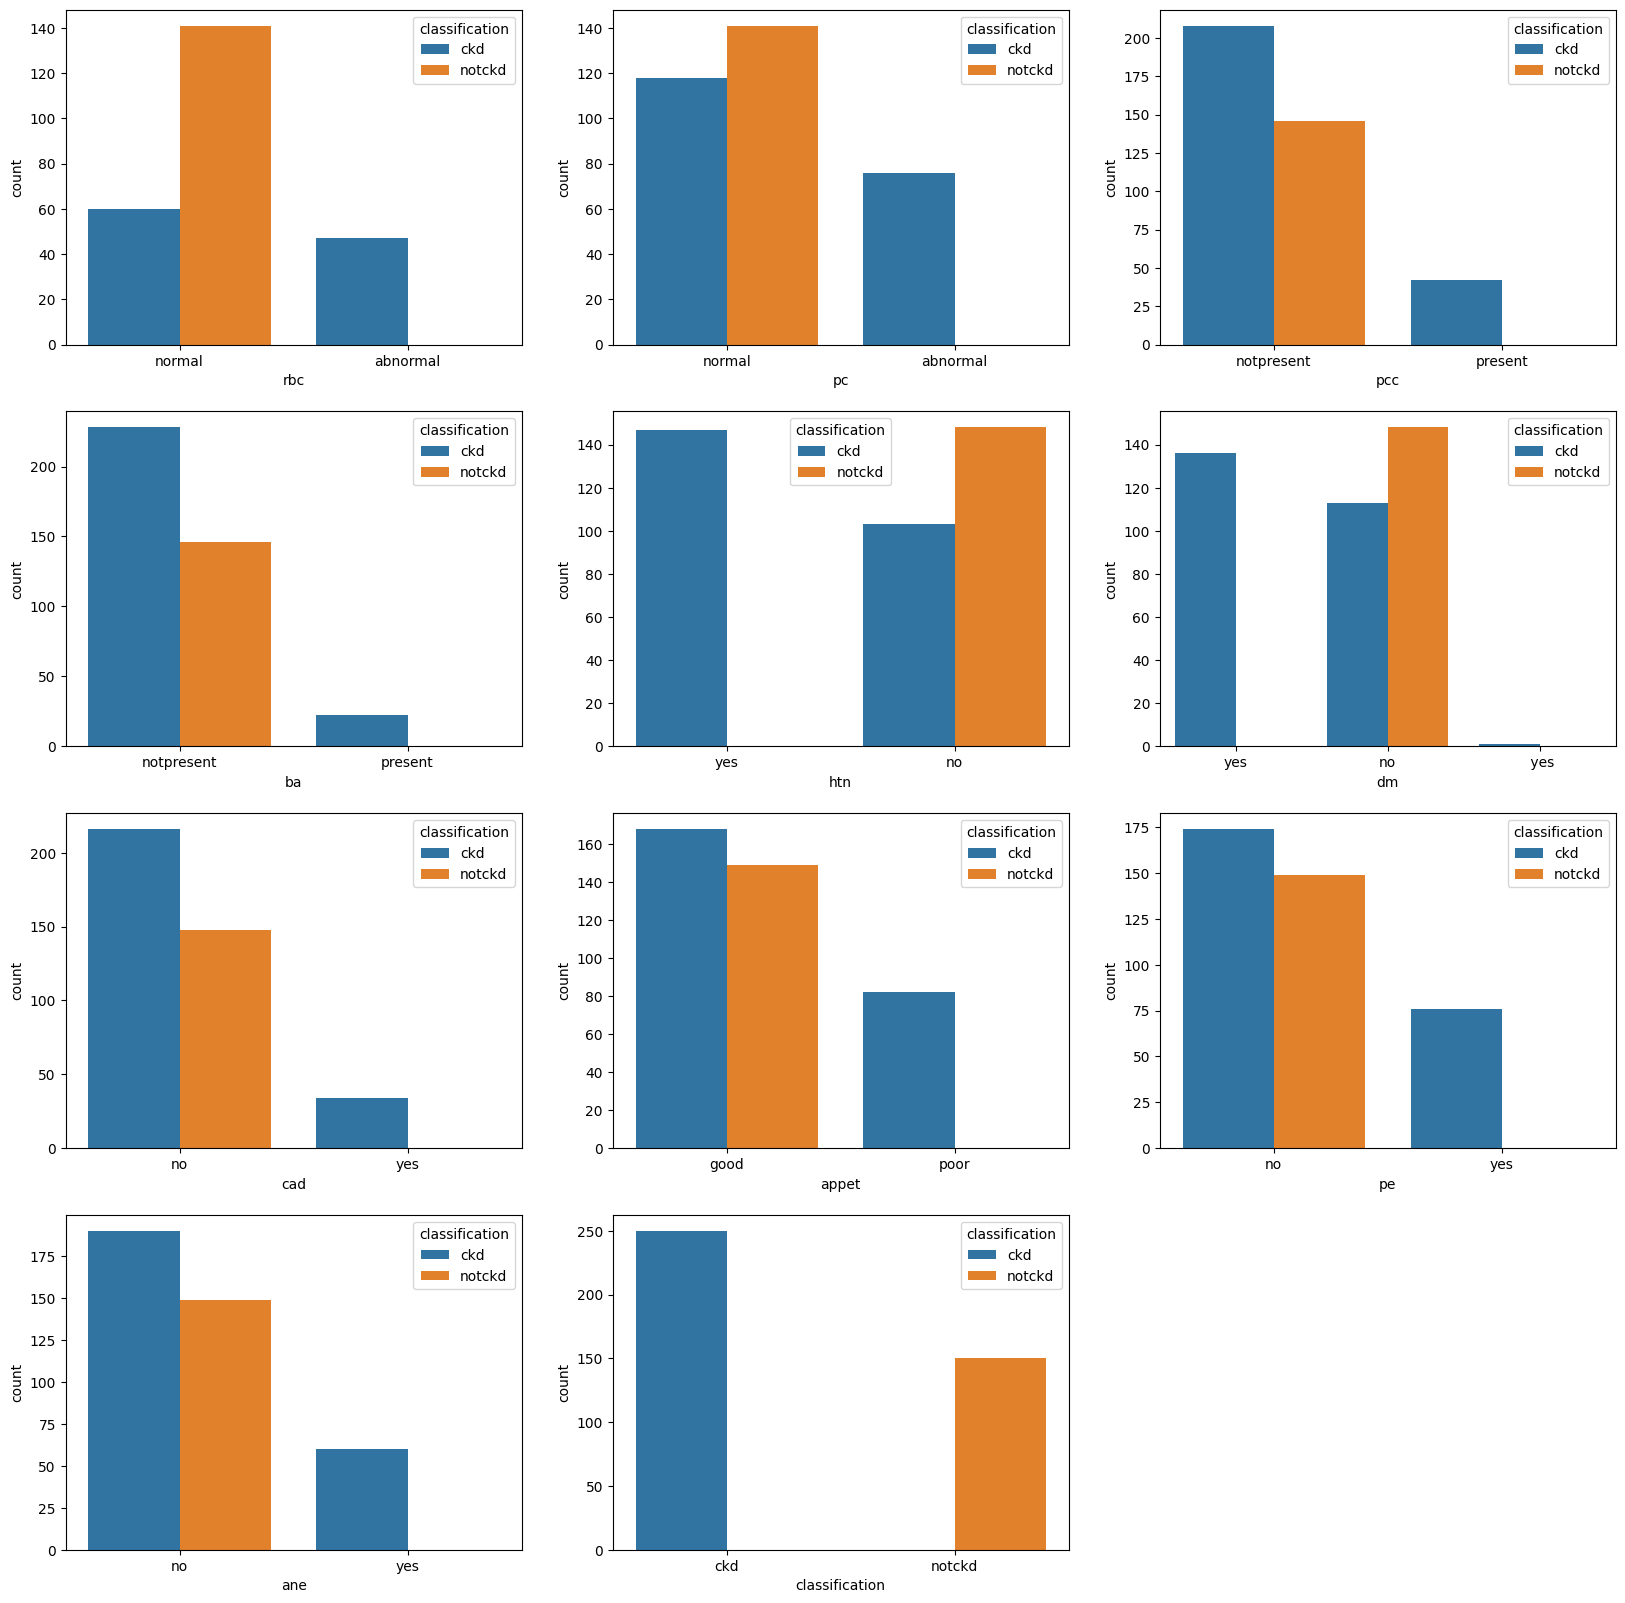

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(x=kidney[feature],hue=kidney['classification'],data=kidney)

<Axes: xlabel='classification', ylabel='count'>

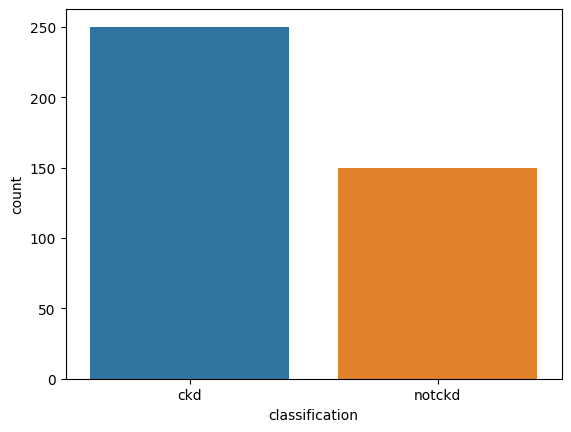

In [ ]:
sns.countplot(x=kidney['classification'],data=kidney)

In [ ]:
# kidney.corr()

<ipython-input-27-55e81987d942>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kidney.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)


<Axes: >

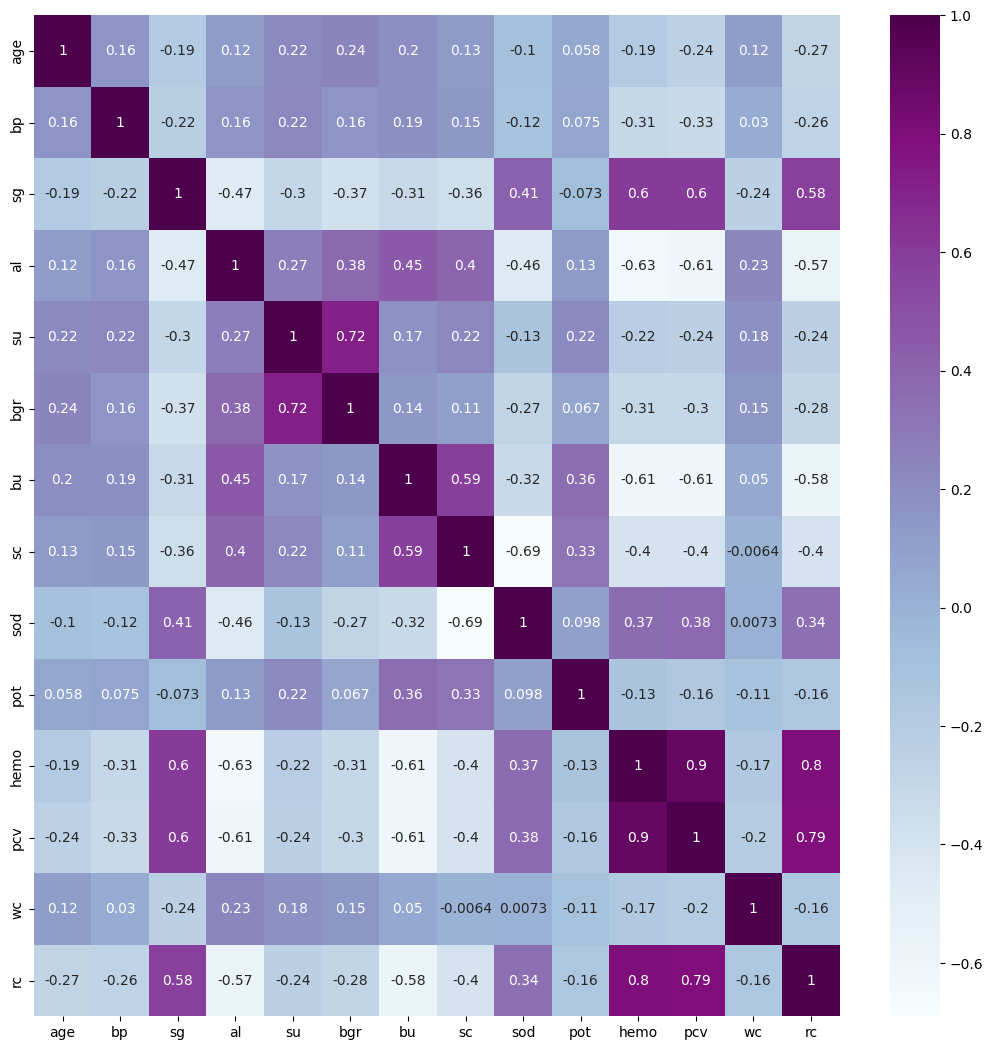

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(kidney.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

In [ ]:
kidney.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
rbc      classification                                   
abnormal ckd                25  3.832000     3.7  2.5  5.6
normal   ckd                40  3.782500     3.8  2.1  8.0
         notckd            134  5.368657     5.3  4.4  6.5

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

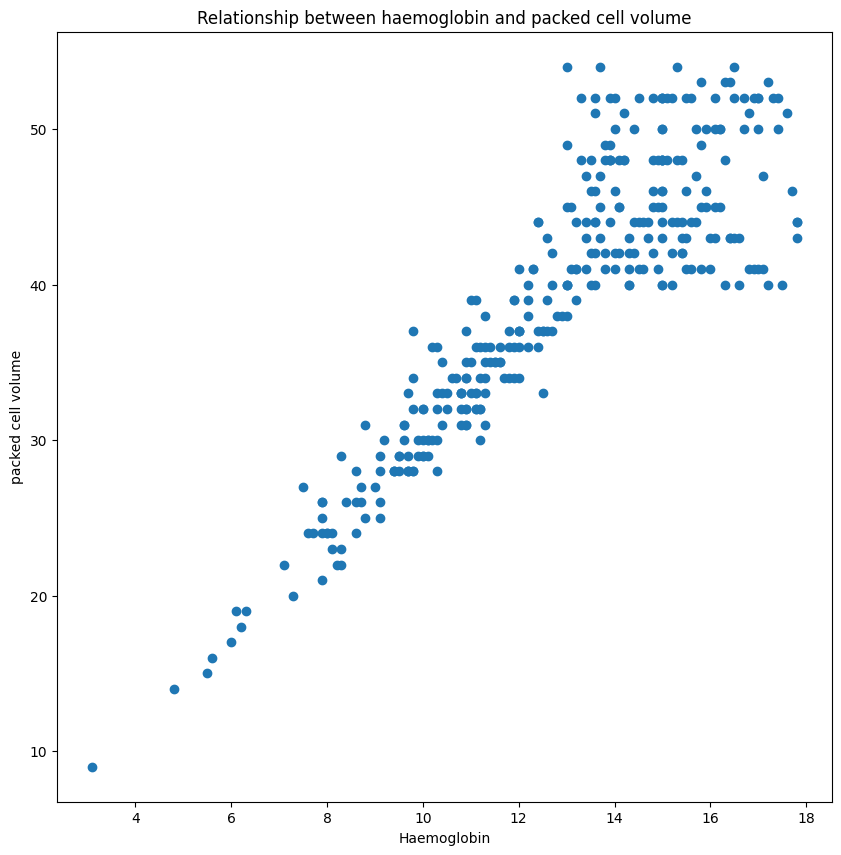

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.hemo,y=kidney['pcv'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


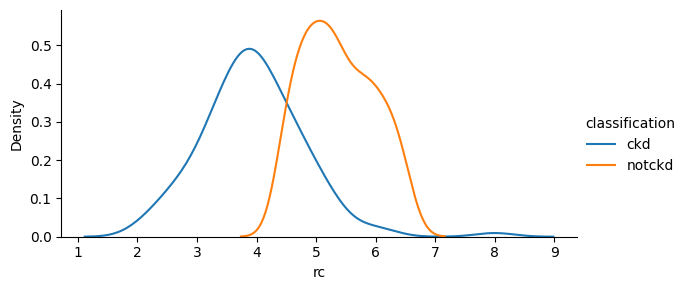

In [ ]:
grid=sns.FacetGrid(hue='classification',aspect=2,data=kidney)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

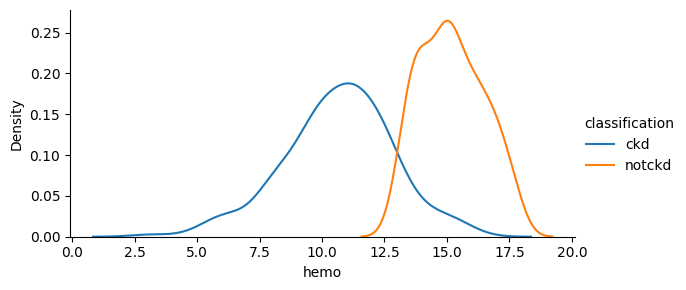

In [ ]:
grid=sns.FacetGrid(kidney,hue='classification',aspect=2)
grid.map(sns.kdeplot,'hemo')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

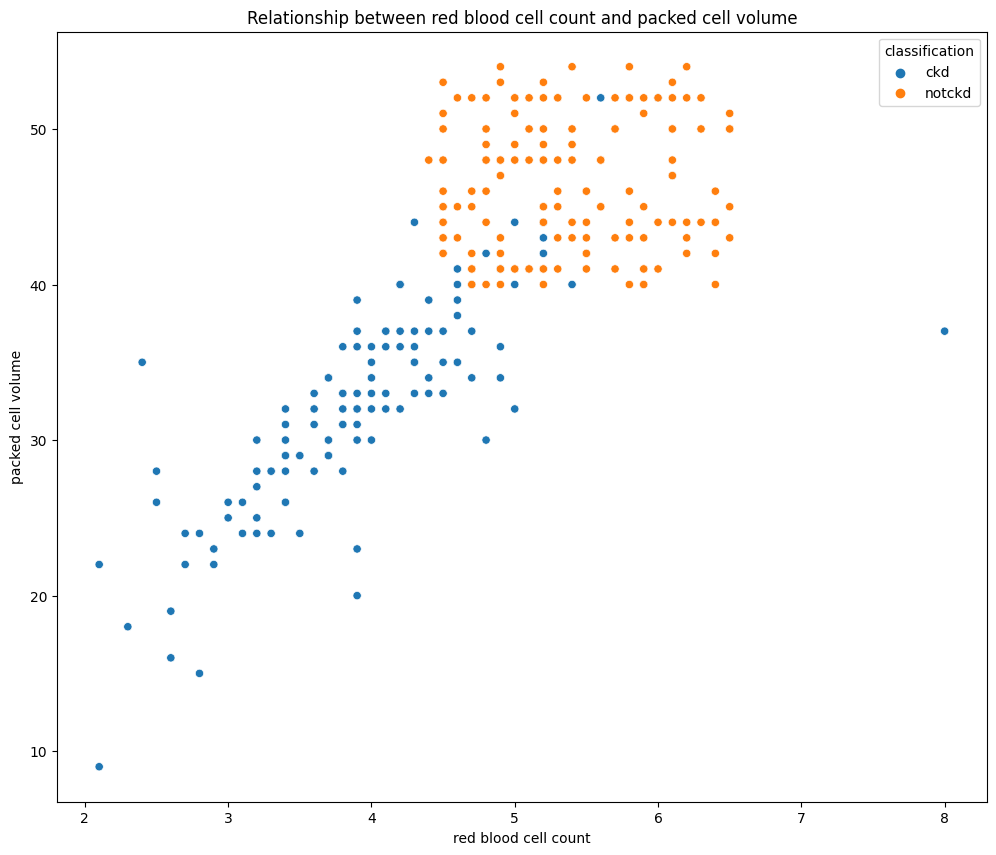

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['rc'],y=kidney['pcv'],hue=kidney['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

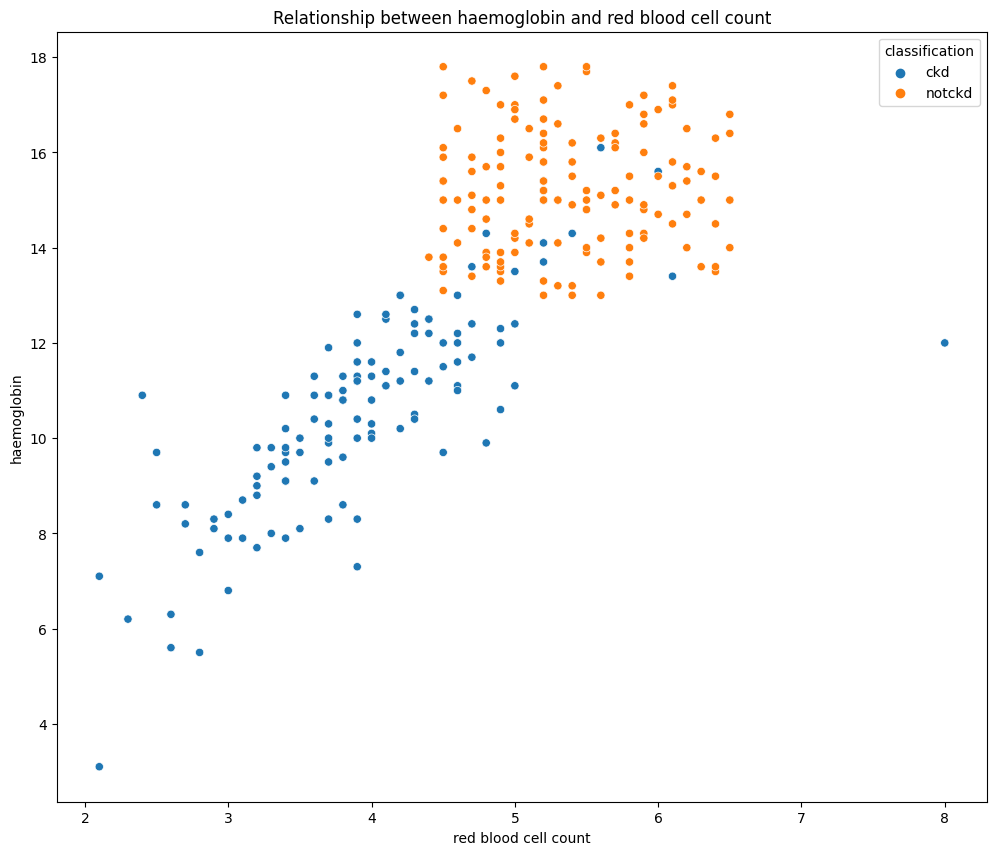

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['rc'],y=kidney['hemo'],hue=kidney['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

In [ ]:
kidney.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
kidney.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: xlabel='classification', ylabel='age'>

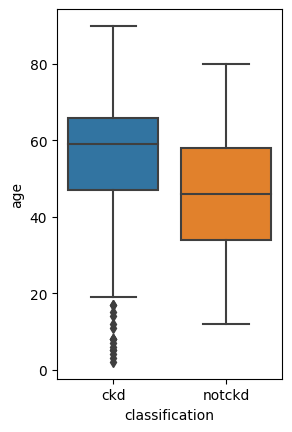

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['classification'],y=kidney['age'])

In [ ]:
list(enumerate(cat_col))

[(0, 'rbc'),
 (1, 'pc'),
 (2, 'pcc'),
 (3, 'ba'),
 (4, 'htn'),
 (5, 'dm'),
 (6, 'cad'),
 (7, 'appet'),
 (8, 'pe'),
 (9, 'ane'),
 (10, 'classification')]

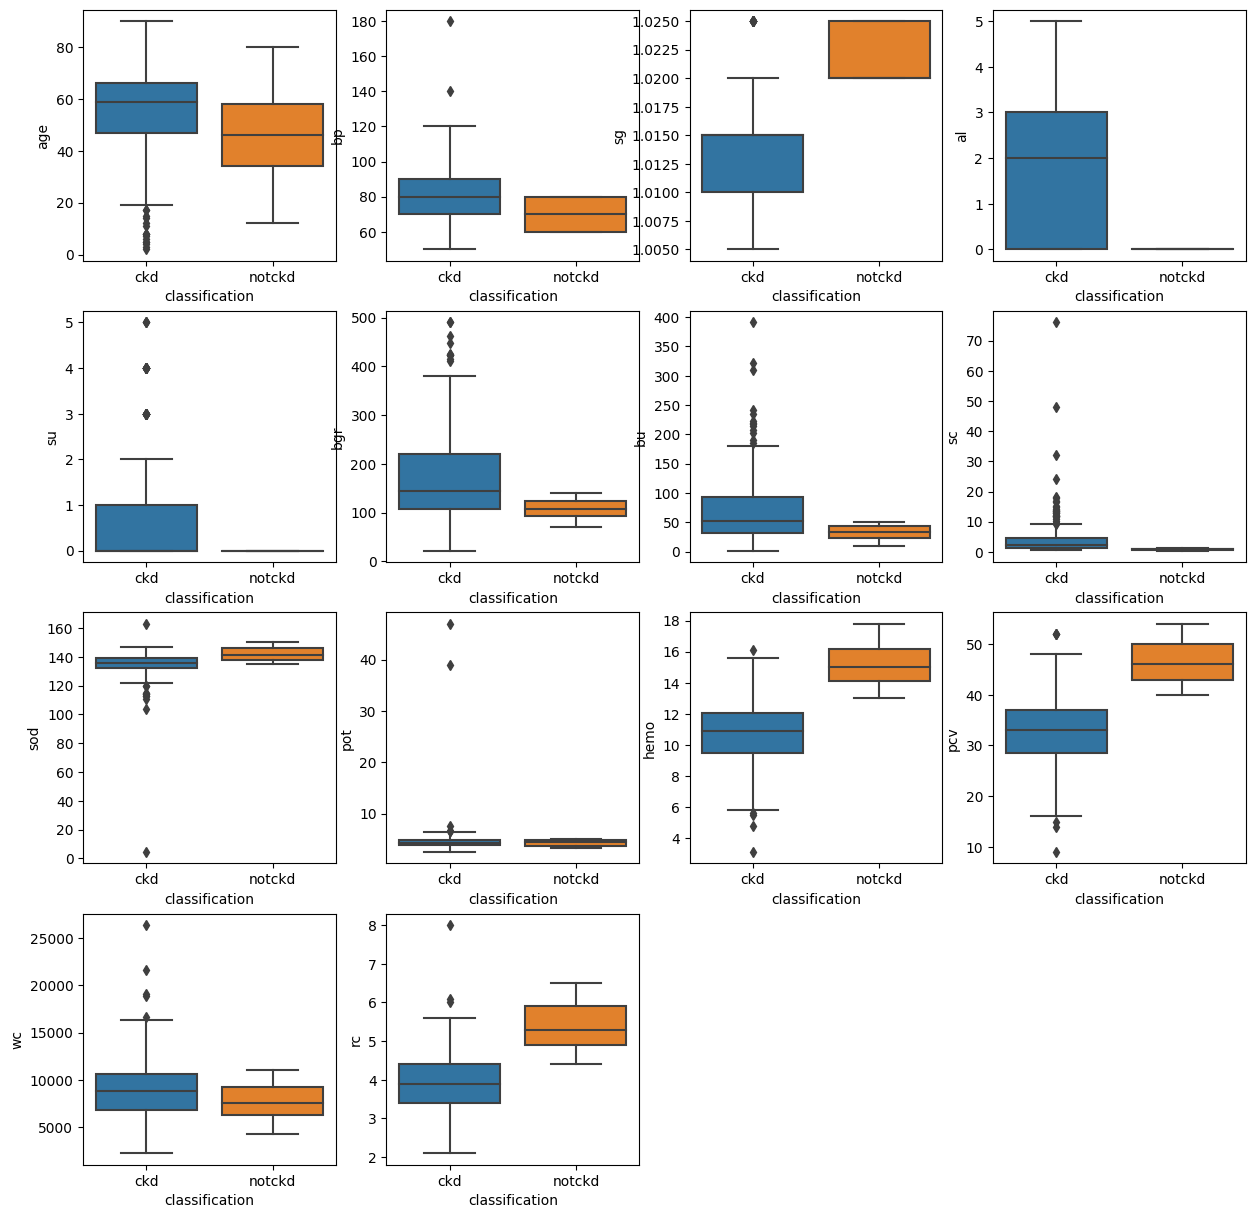

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['classification'],y=i[1],data=kidney.reset_index())

In [ ]:
np.mean(kidney)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


age       51.483376
bp        76.469072
sg         1.017408
al         1.016949
su         0.450142
bgr      148.036517
bu        57.425722
sc         3.072454
sod      137.528754
pot        4.627244
hemo      12.526437
pcv       38.884498
wc      8406.122449
rc         4.707435
dtype: float64

In [ ]:
kidney.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)

In [ ]:
kidney.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


In [ ]:
kidney['rbc'].isnull().sum()

152

In [ ]:
random_sample=kidney['rbc'].dropna().sample(152)

In [ ]:
random_sample

155    abnormal
196    abnormal
308      normal
258      normal
48       normal
         ...   
226    abnormal
253      normal
149    abnormal
341      normal
246    abnormal
Name: rbc, Length: 152, dtype: object

In [ ]:
kidney[kidney['rbc'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [ ]:
random_sample.index

Int64Index([155, 196, 308, 258,  48, 277, 288, 297, 264, 239,
            ...
             35, 307, 352, 357, 371, 226, 253, 149, 341, 246],
           dtype='int64', length=152)

In [ ]:
random_sample.index=kidney[kidney['rbc'].isnull()].index    #in this way index will be equal

In [ ]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [ ]:
kidney.loc[kidney['rbc'].isnull(),'rbc']=random_sample

In [ ]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney['rbc'].isnull().sum()

0

<Axes: xlabel='rbc', ylabel='count'>

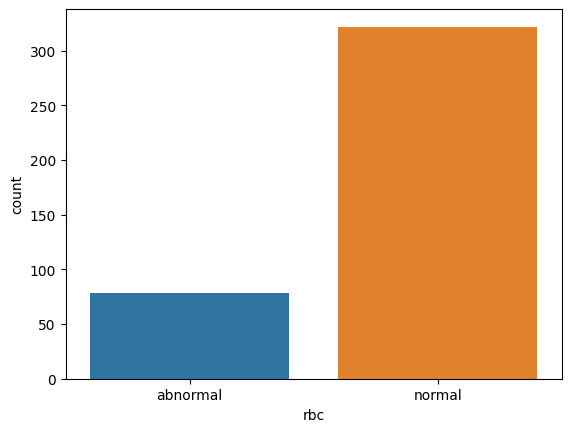

In [ ]:
sns.countplot(x=kidney['rbc'])       # checking that ratio didnt change after filling missing values

In [ ]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample

In [ ]:
Random_value_Imputation('pc')     #only this column because it has higher no. of missing value

In [ ]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               4
ba                4
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [ ]:
def impute_mode(feature):
    mode=kidney[feature].mode()[0]
    kidney[feature]=kidney[feature].fillna(mode)

In [ ]:
for col in cat_col:
    impute_mode(col)

In [ ]:
kidney[cat_col].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

rbc has 2 categories
pc has 2 categories
pcc has 2 categories
ba has 2 categories
htn has 2 categories
dm has 3 categories
cad has 2 categories
appet has 2 categories
pe has 2 categories
ane has 2 categories
classification has 2 categories


In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])

In [ ]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
ind_col=[col for col in kidney.columns if col!='classification']
dep_col='classification'

In [ ]:
X=kidney[ind_col]
y=kidney[dep_col]

In [ ]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [ ]:
imp_features=SelectKBest(score_func=chi2,k=20)

In [ ]:
imp_features=imp_features.fit(X,y)

In [ ]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x7f34b8572320>)

In [ ]:
imp_features.scores_

array([1.15859940e+02, 8.17867015e+01, 5.03531613e-03, 2.16000000e+02,
       9.48000000e+01, 9.13043478e+00, 1.42500539e+01, 2.52000000e+01,
       1.32000000e+01, 2.24165129e+03, 2.34309714e+03, 3.57792101e+02,
       2.75587488e+01, 2.95133869e+00, 1.23856342e+02, 3.08181415e+02,
       9.70105039e+03, 1.91130252e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [ ]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [ ]:
datascore

,Score
0,115.859940
1,81.786701
2,0.005035
3,216.000000
4,94.800000
5,9.130435
6,14.250054
7,25.200000
8,13.200000
9,2241.651289


In [ ]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [ ]:
dfcols=pd.DataFrame(X.columns)

In [ ]:
dfcols

,0
0,age
1,bp
2,sg
3,al
4,su
5,rbc
6,pc
7,pcc
8,ba
9,bgr


In [ ]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,age,115.859940
1,bp,81.786701
2,sg,0.005035
3,al,216.000000
4,su,94.800000
5,rbc,9.130435
6,pc,14.250054
7,pcc,25.200000
8,ba,13.200000
9,bgr,2241.651289


In [ ]:
features_rank.columns=['features','score']

In [ ]:
features_rank

,features,score
0,age,115.859940
1,bp,81.786701
2,sg,0.005035
3,al,216.000000
4,su,94.800000
5,rbc,9.130435
6,pc,14.250054
7,pcc,25.200000
8,ba,13.200000
9,bgr,2241.651289


In [ ]:
features_rank.nlargest(10,'score')

,features,score
16,wc,9701.050391
10,bu,2343.097145
9,bgr,2241.651289
11,sc,357.792101
15,pcv,308.181415
3,al,216.000000
14,hemo,123.856342
0,age,115.859940
4,su,94.800000
18,htn,88.200000


In [ ]:
selected=features_rank.nlargest(10,'score')['features'].values

In [ ]:
selected

array(['wc', 'bu', 'bgr', 'sc', 'pcv', 'al', 'hemo', 'age', 'su', 'htn'],
      dtype=object)

In [ ]:
not_selected=features_rank.nsmallest(14,'score')['features'].values

In [ ]:
not_selected

array(['sg', 'pot', 'rbc', 'ba', 'pc', 'rc', 'cad', 'dm', 'pcc', 'sod',
       'ane', 'pe', 'appet', 'bp'], dtype=object)

In [ ]:
X_new=kidney[selected]

In [ ]:
X_new.head()

,wc,bu,bgr,sc,pcv,al,hemo,age,su,htn
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [ ]:
len(X_new)

400

In [ ]:
X_new.shape
X_new.tail()

,wc,bu,bgr,sc,pcv,al,hemo,age,su,htn
395,6700.0,49.0,140.0,0.5,47.0,0.0,15.7,55.0,0.0,0
396,7800.0,31.0,75.0,1.2,54.0,0.0,16.5,42.0,0.0,0
397,6600.0,26.0,100.0,0.6,49.0,0.0,15.8,12.0,0.0,0
398,7200.0,50.0,114.0,1.0,51.0,0.0,14.2,17.0,0.0,0
399,6800.0,18.0,131.0,1.1,53.0,0.0,15.8,58.0,0.0,0


Adding new column for eGFR

In [ ]:

for i in range(len(X_new)):
  if X_new['sc'][i]<=0.7 :
    # X_new['egfr'][i] = 166*(((X_new['sc'][i])/0.7 )**(-0.329)) * ((0.993)**(X_new['age'][i]))
    X_new.loc[i, 'egfr'] = 166 * ((X_new.loc[i, 'sc'] / 0.7) ** (-0.329)) * (0.993 ** X_new.loc[i, 'age'])

  else :
    # X_new['egfr'][i] = 166*(((X_new['sc'][i])/0.7 )**(-1.209)) * ((0.993)**(X_new['age'][i]))
    X_new.loc[i, 'egfr'] = 166 * ((X_new.loc[i, 'sc'] / 0.7) ** (-1.209)) * (0.993 ** X_new.loc[i, 'age'])

for i in range(len(X_new)):
  if y[i]==1:
    X_new.loc[i, 'stage']=0
  elif X_new['egfr'][i]>=90:
    X_new.loc[i, 'stage']=1
  elif X_new['egfr'][i]>=60:
    X_new.loc[i, 'stage']=2
  elif X_new['egfr'][i]>=30:
    X_new.loc[i, 'stage']=3
  elif X_new['egfr'][i]>=15:
    X_new.loc[i, 'stage']=4
  elif X_new['egfr'][i]<15:
    X_new.loc[i, 'stage']=5

print(X_new.tail())
print(X_new.head())


# GFR = 166 ∗ (Scr/0.7 )^(−0.329) ∗ (0.993)^(Age) (2) Equation 2 is used when Serum Creatinine value is less than or equal to 0.7.

# GFR = 166 ∗ (Scr/0.7 ) −1.209 ∗ (0.993)Age (3) Equation 3 is used when Serum Creatinine value is greater than 0.7.

# GFR = 163 ∗ (Scr/0.9 ) −0.411 ∗ (0.993)Age (4) Equation 4 is used when Serum Creatinine value is less than or equal to 0.9.

# GFR = 163 ∗ (Scr/0.7 ) −1.209 ∗ (0.993)Age (5) Equation 5 is used when Serum Creatinine value is greater than 0.9.


         wc    bu    bgr   sc   pcv   al  hemo   age   su  htn        egfr  \
395  6700.0  49.0  140.0  0.5  47.0  0.0  15.7  55.0  0.0    0  126.006480   
396  7800.0  31.0   75.0  1.2  54.0  0.0  16.5  42.0  0.0    0   64.412466   
397  6600.0  26.0  100.0  0.6  49.0  0.0  15.8  12.0  0.0    0  160.518304   
398  7200.0  50.0  114.0  1.0  51.0  0.0  14.2  17.0  0.0    0   95.712540   
399  6800.0  18.0  131.0  1.1  53.0  0.0  15.8  58.0  0.0    0   63.950549   

     stage  
395    0.0  
396    0.0  
397    0.0  
398    0.0  
399    0.0  
       wc    bu    bgr   sc   pcv   al  hemo   age   su  htn        egfr  \
0  7800.0  36.0  121.0  1.2  44.0  1.0  15.4  48.0  0.0    1   61.754046   
1  6000.0  18.0  121.0  0.8  38.0  4.0  11.3   7.0  0.0    0  134.474694   
2  7500.0  53.0  423.0  1.8  31.0  2.0   9.6  62.0  3.0    0   34.281559   
3  6700.0  56.0  117.0  3.8  32.0  4.0  11.2  48.0  0.0    1   15.326295   
4  7300.0  26.0  106.0  1.4  35.0  2.0  11.6  51.0  0.0    0   50.185066 

<ipython-input-93-336225f41e67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.loc[i, 'egfr'] = 166 * ((X_new.loc[i, 'sc'] / 0.7) ** (-1.209)) * (0.993 ** X_new.loc[i, 'age'])
<ipython-input-93-336225f41e67>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.loc[i, 'stage']=2


In [ ]:
X_new['stage']

0      2.0
1      1.0
2      3.0
3      4.0
4      3.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: stage, Length: 400, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
stage=X_new['stage']
X_new.drop('egfr',inplace=True,axis=1)
X_new.drop('stage',inplace=True,axis=1)
X_train,X_test,y_train,y_test, y_train_stage, y_test_stage=train_test_split(X_new.values,y.values,stage.values,random_state=0,test_size=0.3)

<ipython-input-96-f619323a417f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.drop('egfr',inplace=True,axis=1)
<ipython-input-96-f619323a417f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.drop('stage',inplace=True,axis=1)


In [ ]:
X_train.shape

(280, 10)

In [ ]:
# y_train.value_counts()    #Checking for imbalancing

In [ ]:
#Doing this to compare the accuracy of selected features and not selected features
X_new_not=kidney[not_selected]
# X_new_not.head()

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_new_not,y,random_state=42,test_size=0.3)

In [ ]:
# X_train2.shape
# y_train2.value_counts()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
classifier=XGBClassifier()
classifier2=XGBClassifier()

In [ ]:
from time import time

# start_time=time()
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# random_search2=RandomizedSearchCV(classifier2,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',n_jobs=-1)
end_time=time()
# print(end_time-start_time)

In [ ]:
random_search.fit(X_train,y_train)

[03:44:18] WARNING: ../src/learner.cc:767: 
Parameters: { "learning-rate" } are not used.



RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning-rate': [0, 0.5, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy')

In [ ]:
# random_search2.fit(X_train2,y_train2)

In [ ]:
random_search.best_estimator_    #Checking for best model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning-rate=0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
# random_search2.best_estimator_

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning-rate': 0,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [ ]:
# random_search2.best_params_

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
# classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=random_search.best_params_["colsample_bytree"], gamma=random_search.best_params_['gamma'], gpu_id=-1,
#               importance_type='gain', interaction_constraints='', learning_rate=random_search.best_params_['learning-rate'], max_delta_step=0,
#               max_depth=random_search.best_params_['max_depth'], min_child_weight=random_search.best_params_['min_child_weight'],
#               monotone_constraints='()', n_estimators=100, n_jobs=8,
#               num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
#               scale_pos_weight=1, subsample=1, tree_method='exact',
#               validate_parameters=1, verbosity=None)

In [ ]:
# classifier2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
#               importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
#               max_depth=5, min_child_weight=1,
#               monotone_constraints='()', n_estimators=100, n_jobs=8,
#               num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
#               scale_pos_weight=1, subsample=1, tree_method='exact',
#               validate_parameters=1, verbosity=None)

In [ ]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor=None,
              random_state=0, ...)

In [ ]:
classifier2.fit(X_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:

y_pred_ckd=classifier.predict(X_test)
y_pred_ckd

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
y_pred_ckd2=classifier2.predict(X_test2)
y_pred_ckd2

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=5, random_state=5, n_jobs=-1)
# # rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

In [ ]:
# y_pred=rf.predict(X_test)
# y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred_ckd)

array([[70,  2],
       [ 0, 48]])

In [ ]:
confusion_matrix(y_test2,y_pred_ckd2)

array([[74,  2],
       [ 1, 43]])

In [ ]:
accuracy_score(y_test,y_pred_ckd)

0.9833333333333333

In [ ]:
accuracy_score(y_test2,y_pred_ckd2)

0.975

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ckd))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
# #FOR EGFR
# ### THIS WAS USING LINEAR REGRESSION TO FIND THE EGFR
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error

# # egfr=X_new['egfr']
# # egfr_train,egfr_test = train_test_split( egfr, test_size=0.3, random_state=42)


# X_train_ckd = X_train[y_train == 0]
# egfr_train_ckd = y_train_egfr[y_train == 0]


# regression_model = LinearRegression()
# regression_model.fit(X_train_ckd, egfr_train_ckd)


# y_pred_regression = regression_model.predict(X_test)
# # y_pred_regression
# # regression_mse = mean_squared_error(y_test_egfr, y_pred_regression)
# # print("Regression MSE:", regression_mse)

# rmse = mean_squared_error(y_test_egfr, y_pred_regression, squared=False)
# print("RMSE: ",rmse)



In [ ]:
# [6700,49,140,0.5,47,0.0,15.7,55,0,0]
# ckd_prediction = classifier.predict([[6000,18,121,0.8,38,4,11.3,7,0,0]])

# if ckd_prediction == 0:
#     # If the patient has CKD, predict eGFR using the regression model
#     eGFR_prediction = regression_model.predict([[6000,18,121,0.8,38,4,11.3,7,0,0]])
#     print("Predicted eGFR:", eGFR_prediction)
# else:
#     print("Patient does not have CKD.")


In [ ]:
# r2 = r2_score(y_test_egfr,y_pred_regression)
# print(f"R-squared: {r2}")

In [ ]:
#Using logistic regression
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Split features and stage labels for CKD cases only
X_ckd_stage = X_new[y == 0]
y_ckd_stage = stage[y == 0]

# filtered_df = X_new[y == 0]

X_ckd_train, X_ckd_val, y_ckd_train, y_ckd_val = train_test_split(X_ckd_stage, y_ckd_stage, test_size=0.2, random_state=42)

# print(X_ckd_stage.shape,y_ckd_stage.shape)


In [ ]:
stage_model = LogisticRegression()

In [ ]:
# param_grid = [
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]

param_dist = {
    'penalty': ['l1', 'l2'],
    'multi_class':['ovr'],
    # 'C': uniform(loc=0, scale=10),
    'solver': ['liblinear']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
r_search = RandomizedSearchCV(stage_model, param_distributions = param_dist, cv = 3, verbose=True, n_jobs=-1)
best_clf = r_search.fit(X_ckd_train,y_ckd_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
best_clf.best_estimator_

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
# Train the stage prediction model
# stage_model.fit(X_ckd_train, y_ckd_train)

# y_stage_pred = stage_model.predict(X_ckd_val)

best_model = best_clf.best_estimator_
best_params = best_clf.best_params_

# Make predictions on the validation set with the best model
y_stage_pred = best_model.predict(X_ckd_val)

# Evaluate the best model
stage_accuracy = accuracy_score(y_ckd_val, y_stage_pred)
print(stage_accuracy)

0.72


In [ ]:
print(classification_report(y_ckd_val, y_stage_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      0.25      0.40         4
         3.0       0.60      0.83      0.70        18
         4.0       0.62      0.38      0.48        13
         5.0       0.93      1.00      0.97        14

    accuracy                           0.72        50
   macro avg       0.83      0.69      0.71        50
weighted avg       0.74      0.72      0.70        50



In [ ]:
from joblib import dump
dump(classifier, 'xgb_model.pkl')
dump(best_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']